In [1]:
import glob
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

import random
from skimage.feature import hog

In [2]:
#Reading all vehicle images and appending them in a list
vehicle_images = glob.glob('./vehicles/vehicles/*/*.png')
vehicles = []

print("Reading vehicle images...")
for img in vehicle_images:
    reader=cv2.imread(img)
    rgbImage = cv2.cvtColor(reader, cv2.COLOR_BGR2RGB)
    vehicles.append(rgbImage)
    
print("Loaded "+ str(len(vehicle_images)) + " vehicle images")

#Reading all non vehicle images and appending them in a list
non_vehicle_images = glob.glob('./non-vehicles/non-vehicles/*/*.png')
non_vehicles=[]

print("Reading non-vehicle images...")
for img in non_vehicle_images:
    reader=cv2.imread(img)
    rgbImage = cv2.cvtColor(reader, cv2.COLOR_BGR2RGB)
    non_vehicles.append(rgbImage)

print("Loaded "+ str(len(non_vehicle_images)) + " non-vehicle images")

Reading vehicle images...
Loaded 8792 vehicle images
Reading non-vehicle images...
Loaded 8968 non-vehicle images


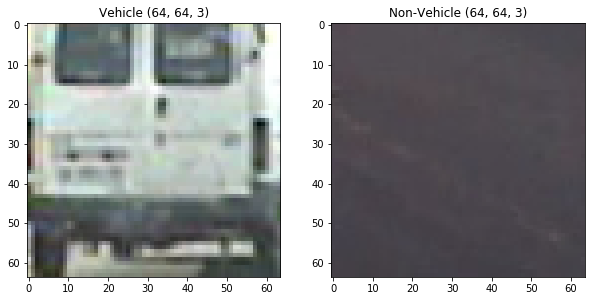

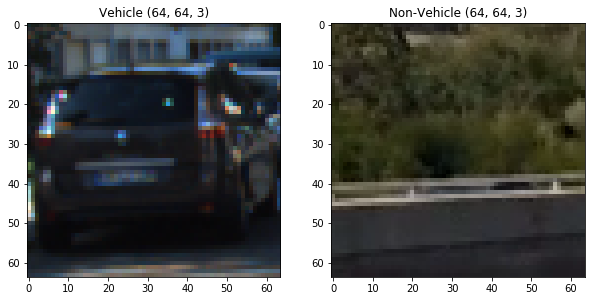

In [3]:
# Visualizing the data

for i in range(2):
    vehicle = random.randint(0, len(vehicles)-1)
    non_vehicle = random.randint(0, len(non_vehicles)-1)
    fig, axes = plt.subplots(1,2, figsize=(10,10))
    axes[0].imshow(vehicles[vehicle])
    text = "Vehicle " + str(vehicles[vehicle].shape)
    axes[0].set_title(text)
    axes[1].imshow(non_vehicles[non_vehicle])
    text = "Non-Vehicle " + str(non_vehicles[non_vehicle].shape)
    axes[1].set_title(text)


##### Extracting the color features of both kinds of images and comparing them

In [26]:
#Extracting YUV color space histogram
def ExtractColorHistogram(image, nbins=32, bins_range=(0,255), resize=None):
    if(resize !=None):
        image= cv2.resize(image, resize)
    zero_channel= np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    first_channel= np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    second_channel= np.histogram(image[:,:,2], bins=nbins, range=bins_range)
    return zero_channel,first_channel, second_channel

#Finding bin edges center
def FindBinCenter(histogram_channel):
    edges = histogram_channel[1]
    centers = (edges[1:]  + edges[0:len(edges)-1])/2
    return centers

#Extracting Color Features from bin lengths
def ExtractColorFeatures(zero_channel, first_channel, second_channel):
    return np.concatenate((zero_channel[0], first_channel[0], second_channel[0]))

No of features are 384


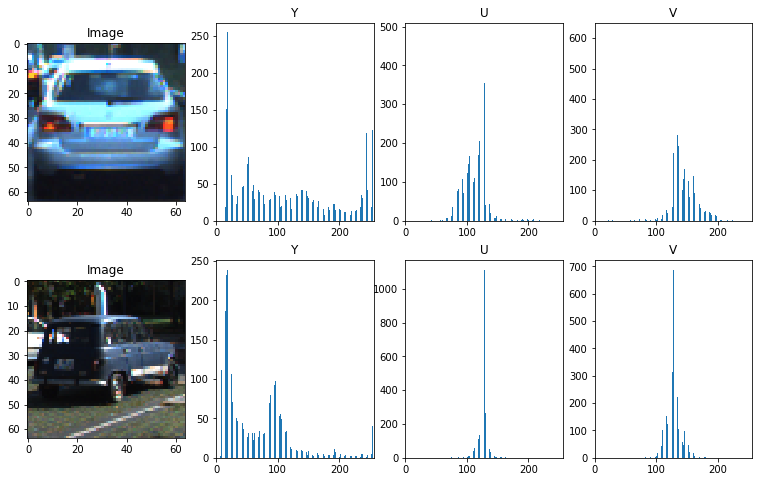

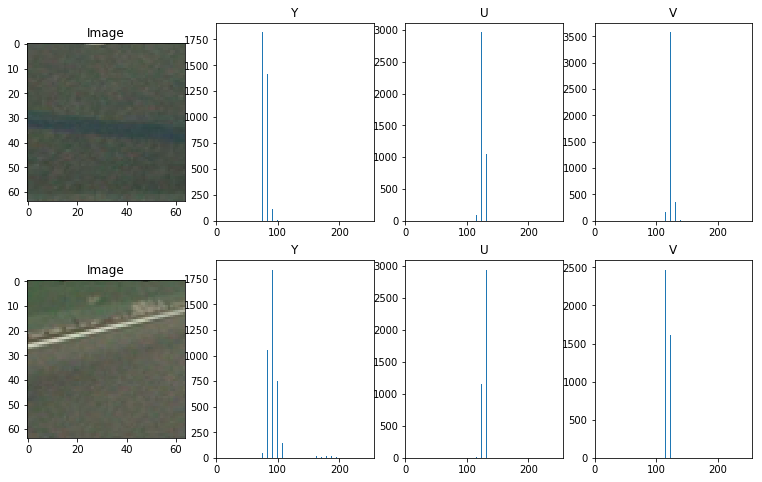

In [54]:
fig, axes= plt.subplots(2,4, figsize=(13,8))

for i in range(2):
    
    vehicle=random.randint(0, len(vehicles)-1)
        
    coloredImage= cv2.cvtColor(vehicles[vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(coloredImage,128)
   
    center= FindBinCenter(r)
    axes[i,0].imshow(vehicles[vehicle])
    axes[i,0].set_title("Image")
    axes[i,1].set_xlim(0,256)
    axes[i,1].bar(center,r[0])
    axes[i,1].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(center,g[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(center,b[0])
    axes[i,3].set_title("V")
    
features = ExtractColorFeatures(r,g,b)
print("No of features are "+ str(len(features)))

fig, axes= plt.subplots(2,4, figsize=(13,8))
for i in range(2):
    non_vehicle=random.randint(0, len(non_vehicles)-1)
    coloredImage= cv2.cvtColor(non_vehicles[non_vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = ExtractColorHistogram(coloredImage)
    
    center= FindBinCenter(r)
    axes[i,0].imshow(non_vehicles[non_vehicle])
    axes[i,0].set_title("Image")
    axes[i,1].set_xlim(0,256)
    axes[i,1].bar(center,r[0])
    axes[i,1].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(center,g[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(center,b[0])
    axes[i,3].set_title("V")

In [55]:
#Resizing Image to extract features, so as to reduce the feature vector size
def spatial_binning_features(image,size):
    image= cv2.resize(image,size)
    return image.ravel()

featureList = spatial_binning_features(vehicles[5],(16,16))
print(len(vehicles[1].ravel()) , " features before spatial binning")
print(len(featureList), " features after spatial binning")

12288  features before spatial binning
768  features after spatial binning


In [56]:
#Extracting HOG features
def hog_features(image, orientation,cellsPerBlock,pixelsPerCell, visualise= False, feature_vector_flag=True):
    if(visualise==True):
        features, image = hog(image, orientations=orientation,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=True, feature_vector=feature_vector_flag)
        return features, image
    else:
        features = hog(image, orientations=orientation,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=False, feature_vector=feature_vector_flag)
        return features

C:\Users\kvtri\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\kvtri\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Feature vector length:   324
No of features that can be extracted:  4096


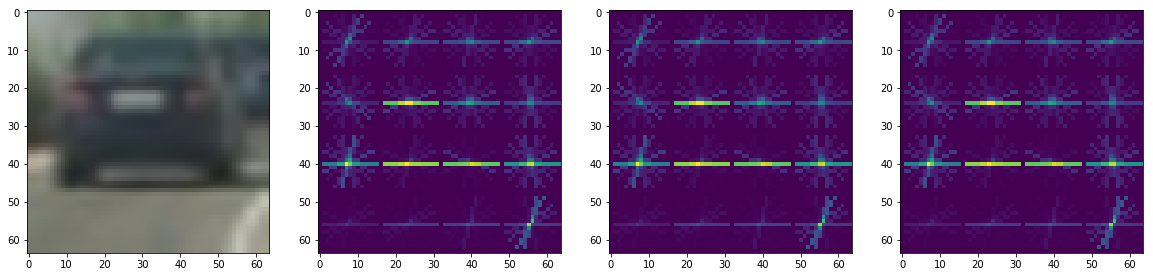

In [58]:
img=vehicles[1]
img= cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
img_channel_0 = img[:,:,0]
img_channel_1 = img[:,:,0]
img_channel_2 = img[:,:,0]

feature_0, hog_img_0 = hog_features(img_channel_0,9,2,16,visualise=True,feature_vector_flag=True)
feature_1, hog_img_1 = hog_features(img_channel_1,9,2,16,visualise=True,feature_vector_flag=True)
feature_2, hog_img_2 = hog_features(img_channel_2,9,2,16,visualise=True,feature_vector_flag=True)

fig, axes= plt.subplots(1,4,figsize=(20,10))
axes[0].imshow(vehicles[1])
axes[1].imshow(hog_img_0)
axes[2].imshow(hog_img_1)
axes[3].imshow(hog_img_2)


print("Feature vector length:  ",len(feature_0))
print("No of features that can be extracted: ",len(hog_img_0.ravel()))

In [59]:
#Convert Image Color Space. Note the colorspace parameter is like cv2.COLOR_RGB2YUV
def convert_to_colorspace(image, colorspace):
    return cv2.cvtColor(image, colorspace)

# Function for extracting features for vehicle and non-vehicle images
def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell, convertColorspace=False):
    featureList=[]
    imageList=[]
    for image in images:
        if(convertColorspace==True):
            image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        features_1=hog_features(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False, True)
        features_2=hog_features(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False, True)
        features_3=hog_features(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False, True)
        final = np.hstack((features_1,features_2,features_3))
        featureList.append(final)
    return featureList

In [61]:
%%time
pixelsPerBlock=16
orientations=9
cellsPerBlock=2
convertColorSpace=True
vehicle_features= ExtractFeatures(vehicles,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
non_vehicle_features= ExtractFeatures(non_vehicles,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)

C:\Users\kvtri\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\kvtri\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Wall time: 39.4 s


In [64]:
features_list= np.vstack([vehicle_features, non_vehicle_features])
print("Shape of features list is ", features_list.shape)
label_list= np.concatenate([np.ones(len(vehicle_features)), np.zeros(len(non_vehicle_features))])
print("Shape of label list is ", label_list.shape)

Shape of features list is  (17760, 972)
Shape of label list is  (17760,)


In [66]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train,  X_test,Y_train, Y_test = train_test_split(features_list, label_list, test_size=0.2, shuffle=True)

#Scaling and normalizing the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled= scale.transform(X_train)
X_test_scaled= scale%%time


In [68]:
#Defining the classifier and training it
from sklearn.svm import LinearSVC
clf= LinearSVC()
clf.fit(X_train,Y_train)
print("Accuracy: ", clf.score(X_test,Y_test) )

Accuracy:  0.98902027027


In [69]:
import matplotlib.image as mpimg

#Defining the windows to input to the classifier
def sliding_window(img, x=[None, None], y=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
   
    if x[0] == None:
        x[0]=0
    if x[1] == None:
        x[1]=img.shape[1]
    if y[0] ==  None:
        y[0]= 0
    if y[1] ==  None:
        y[1]=img.shape[0]
    
    
    window_list = []
    width_x= x[1] - x[0]
    width_y= y[1] - y[0]
     
    x_window = np.int( 1 + (width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    y_window = np.int( 1 + (width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))
    
    modified_window_size= xy_window
    for i in range(0,y_window):
        y_start = y[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,x_window):
            x_start = x[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = np.int( x_start +  modified_window_size[0])
            y1= np.int( y_start + modified_window_size[1])
            window_list.append(((x_start,y_start),(x1,y1)))
    return window_list

#Funcction to draw boxes around identified features

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    img2 = np.copy(img)
    for bbox in bboxes:
        color=(250, 0, 100)
        cv2.rectangle(img2, bbox[0], bbox[1], color, thick)
    return img2

In [70]:
#This function runs the features of the clipped image throught the classifier to predict whether it is a car or not
#It takes all sliding windows as input and returns the windows with cars as output

def cars_found(image, windows, converColorspace=False):
    windows_with_car=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        #Selecting just the window portion
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (64,64))
            features = ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
            pred = clf.predict([features[0]])
            if(pred == 1):
                windows_with_car.append(window)
        
    return windows_with_car

Total No of windows are  470


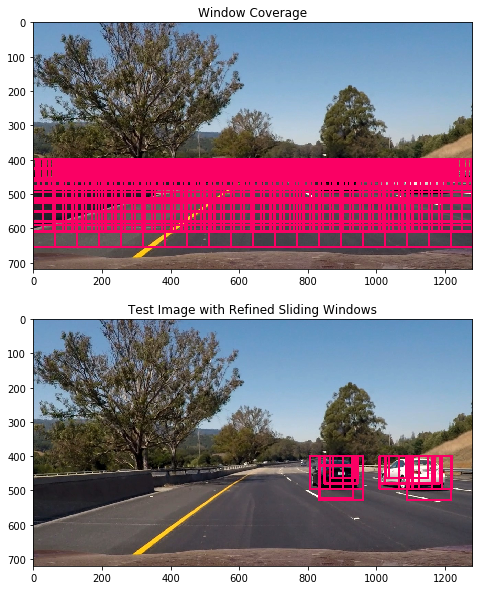

In [116]:
#testing our functions of slide_window and draw window. Defining here dummy windows

image = mpimg.imread('test6.jpg')

windows1 = sliding_window(image, [0, 1280], [400,464], 
                    xy_window=(64,64), xy_overlap=(0.15, 0.15))
windows4 = sliding_window(image, [0, 1280], [400,480], 
                    xy_window=(80,80), xy_overlap=(0.2, 0.2))
windows2 = sliding_window(image, [0, 1280], [400,612], 
                    xy_window=(96,96), xy_overlap=(0.3, 0.3))
windows3 = sliding_window(image, [0, 1280], [400,660], 
                    xy_window=(128,128), xy_overlap=(0.5, 0.5))


windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))

fig,axes= plt.subplots(2,1, figsize=(20,10))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, windows_with_car) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)



In [88]:
# function to increase the pixel by one inside each box

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

# applying a threshold value to the image to filter out low pixel cells

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [89]:
# find pixels with each car number and draw the final bounding boxes

from scipy.ndimage.measurements import label
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

2  car(s) found


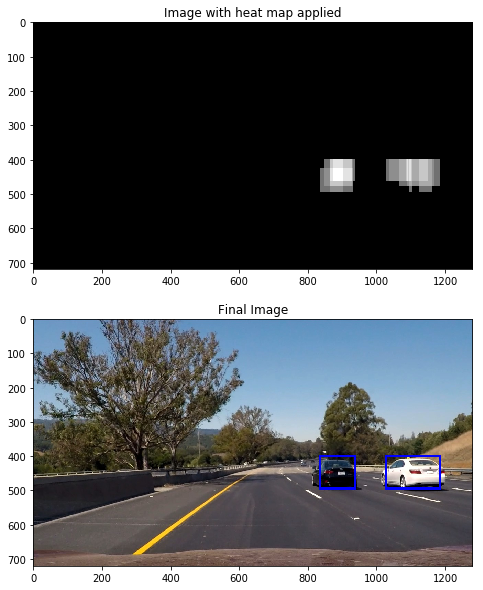

In [90]:
heated = np.zeros_like(image[:,:,0]).astype(np.float)
heated = add_heat(heated,windows_with_car)
    
# Apply threshold to help remove false positives
heated = apply_threshold(heated,3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heated, 0, 255)

heat_image = heatmap

labels = label(heatmap)
print(labels[1], " car(s) found" )
draw_img = draw_labeled_bboxes(np.copy(image), labels)

f,axes= plt.subplots(2,1, figsize=(20,10))
axes[0].imshow(heat_image,cmap='gray')
axes[0].set_title("Image with heat map applied")
axes[1].imshow(draw_img)
axes[1].set_title("Final Image")

In [100]:
# Defining a class to store the refined frames found from the last 15 frames

class KeepTrack():
    def __init__(self):
        self.refinedWindows = [] 
        
    def AddWindows(self, refinedWindow):
        self.refinedWindows.append(refinedWindow)
        frameHistory=15
        if len(self.refinedWindows) > frameHistory:
            self.refinedWindows = self.refinedWindows[len(self.refinedWindows)-frameHistory:]


In [101]:
#defining the Parameters required for the pipeline to run

# For HOG
orientation = 9 
cellsPerBlock = 2 
pixelsPerCell = 16 

#Windows
xy_window=(64, 64) 
xy_overlap=(0.15, 0.15) 
x=[0, image.shape[1]] 
y=[400, 660] 

# Window 1
#Size - 64x64 
#Overlap-85%
windows_normal = sliding_window(image, x, [400,464], 
                    xy_window, xy_overlap)

# Window 2
# Size - 80x80 
#Overlap-80%
xy_window_1_25= (80,80)
xy_window_1_25_overlap=(0.2, 0.2)    
windows_1_25 = sliding_window(image, x, [400,480], 
                    xy_window_1_25, xy_window_1_25_overlap)

# Window 3
# Size - 96x96 
#Overlap-70%
xy_window_1_5= (96,96)
xy_window_1_5_overlap=(0.3, 0.3)    
windows_1_5 = sliding_window(image, x, [400,612], 
                    xy_window_1_5, xy_window_1_5_overlap)

# Window 4
#Size - 128x128 
#Overlap-50%
xy_window_twice_overlap=(0.5, 0.5)    
xy_window_twice = (128,128)
windows_twice = sliding_window(image, x, [400,660], 
                    xy_window_twice, xy_window_twice_overlap)

# Total Windows
# 470
windows = windows_normal +  windows_1_5  + windows_twice +windows_1_25

In [102]:
# Defining a pipeline for Video Frame Processing
# Note here the track of last 15 frames is kept

def Pipeline(image):

    r= random.randint(0,1)
    if(r<0.4):
        windows_with_car = keepTrack.refinedWindows[:-1]
    else:
        windows_with_car = cars_found(image,windows, True)
        if len(windows_with_car) > 0:
            keepTrack.AddWindows(windows_with_car)

    heated = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for w in keepTrack.refinedWindows:
        heated = add_heat(heated, w)

    heatmap = apply_threshold(heated, 25 + len(keepTrack.refinedWindows)//2)
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

In [110]:
# Defining a different pipeline to process the images as we do not want to keep track of previous frames here

def PipelineImage(image):

    windows_with_car = cars_found(image,windows, True)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,windows_with_car)
   
    heatmap = np.clip(heat, 0, 255)
    heatmap = apply_threshold(heat, 4)
    labels = label(heatmap)
    
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img,heatmap

C:\Users\kvtri\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\kvtri\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


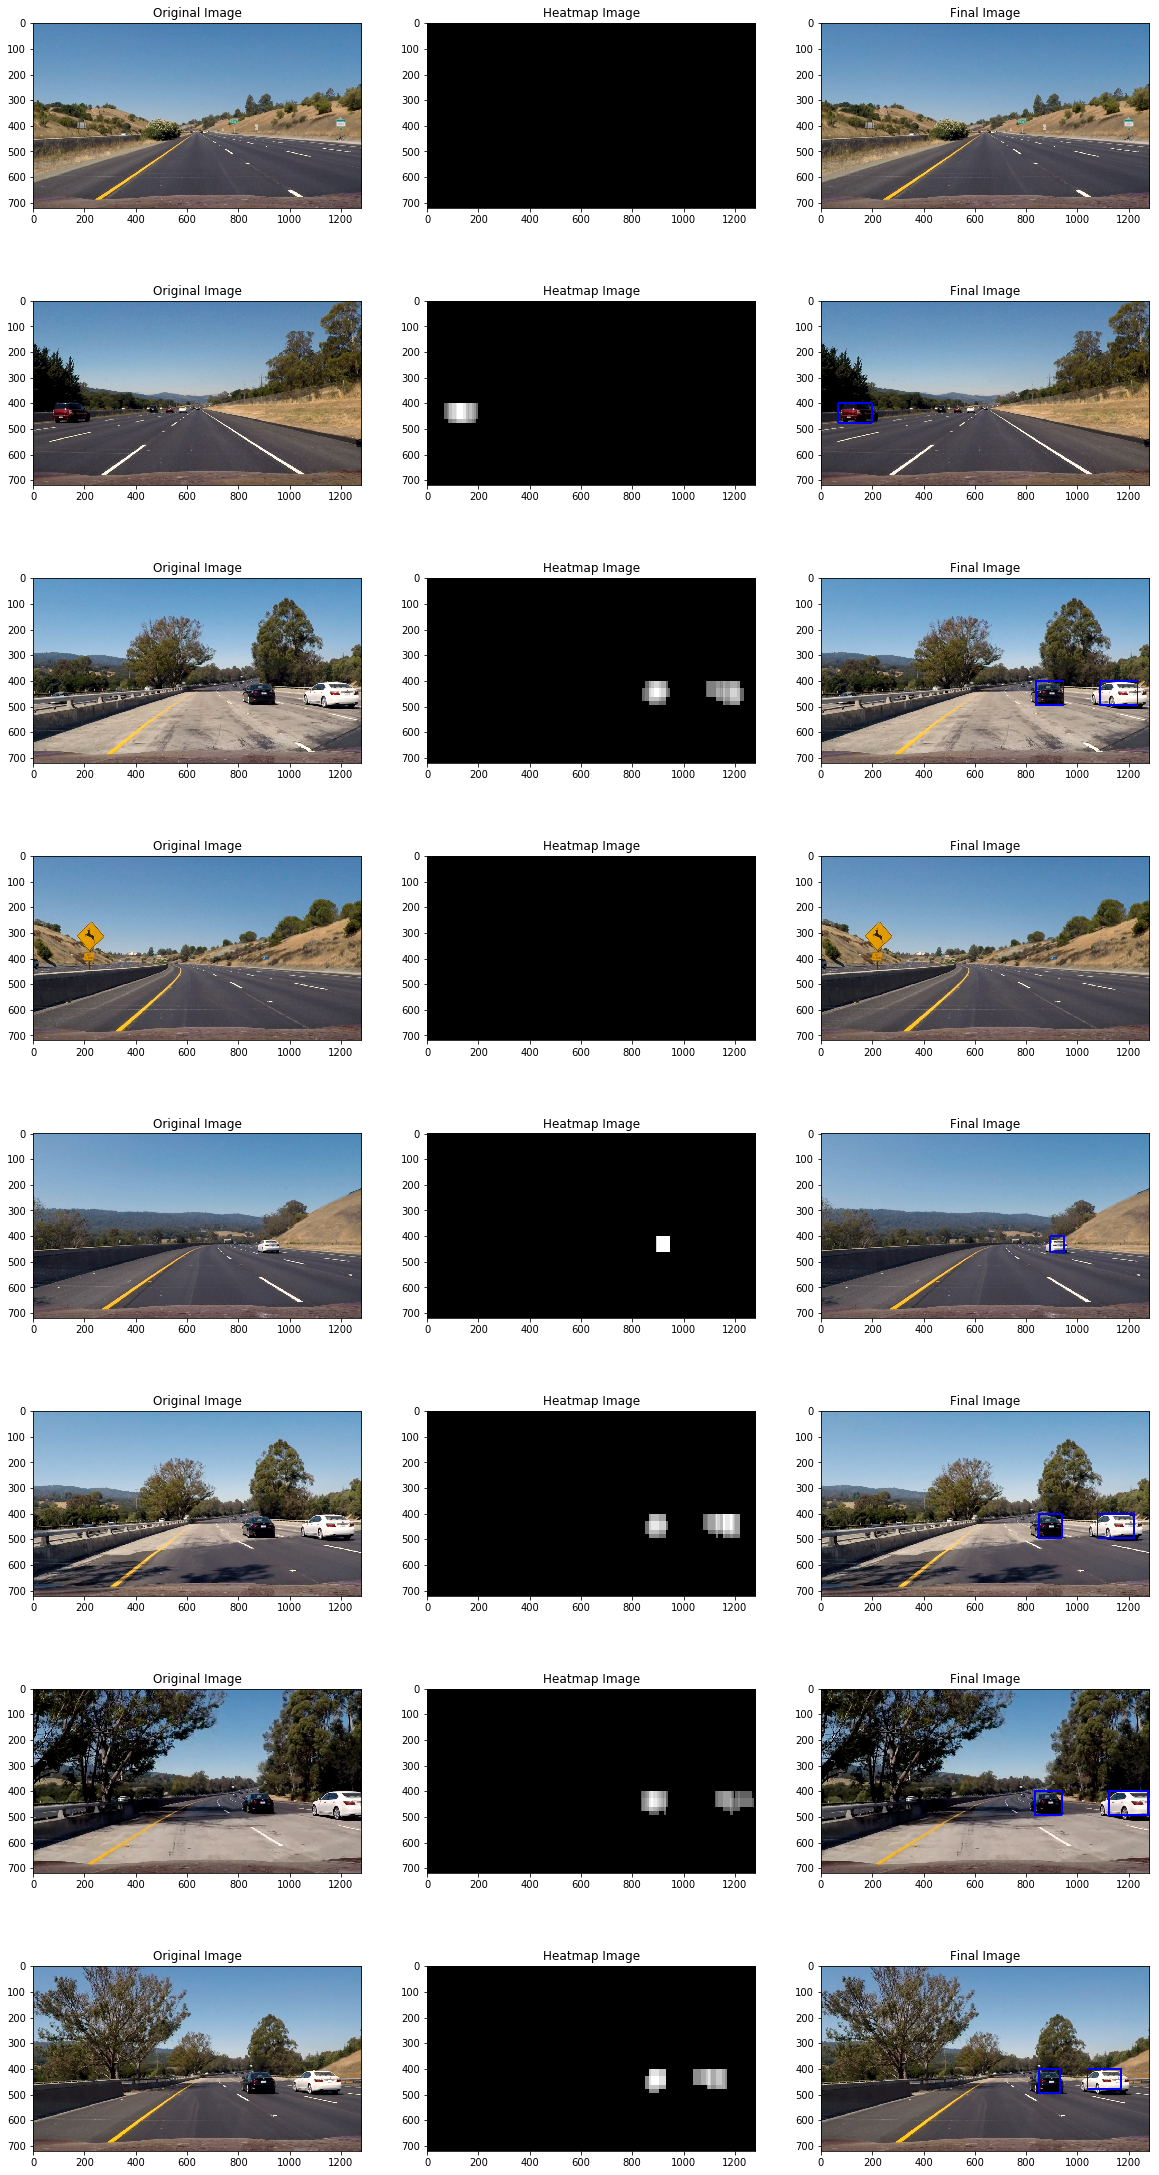

In [111]:
# Testing on images

test_images= glob.glob("./test_images/*.jpg")
fig, axes= plt.subplots(8,3, figsize=(20,40))

for index,image in enumerate(test_images):
    image = cv2.imread(image)
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    finalPic,heatmap = PipelineImage(image)
    axes[index,0].imshow(image)
    axes[index,0].set_title("Original Image")
    axes[index,1].imshow(heatmap,cmap='gray')
    axes[index,1].set_title("Heatmap Image")
    axes[index,2].imshow(finalPic)
    axes[index,2].set_title("Final Image")


In [113]:
keepTrack = KeepTrack()
import moviepy
from moviepy.editor import VideoFileClip
video_output1 = 'my_video.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(Pipeline)
%time processed_video.write_videofile(video_output1, audio=False)
video_input1.reader.close()
video_input1.audio.reader.close_proc()

[MoviePy] >>>> Building video my_video.mp4
[MoviePy] Writing video my_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [19:31<00:00,  1.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: my_video.mp4 

Wall time: 19min 35s
